
### Regression and Classification with the Ames Housing Data

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Psuedo Code
 Find the fixed charactistics of a house - and create a dataframe that only has these;
 Clean values from the dataframe to increase the quality of the data;
 Create another dataframe that has charactistics that can be changed about a house


In [2]:
# Load the data and create two dataframes - one with the fixed properties of the houses and one with the factors
# that can change if some money is invested in the property.
house = pd.read_csv('/Users/amitchandna/Documents/Data_Science/London_DSI/DSI_GA/DSI13-lessons/project/project-3/housing.csv')
fixed_house = house[['MSSubClass','Utilities','YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageCars', 
                    'FullBath','HalfBath','LotFrontage','LotArea','Alley','LotShape','LandContour',
                    'LotConfig','Neighborhood','Condition1','BldgType','HouseStyle', 'YearBuilt',
                     'MasVnrArea', 'Foundation', 'BsmtQual','BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'Heating',
                    '1stFlrSF','2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                    'GarageType', 'GarageCars', 'OpenPorchSF',
                     'EnclosedPorch', 'PoolArea', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice' ]]
fixed_house.shape

(1460, 47)

In [3]:
fixed_house.shape

(1460, 47)

In [4]:
# Clean up the fixed characteristics dataframe and describe the df 
# Also split the data into pre 2010 vs 2010 for testing and training of the model.
fixed_house = pd.get_dummies(fixed_house)
fixed_house = fixed_house.dropna()
fixed_house.describe().T


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1195.0,57.234310,43.135915,20.0,20.0,50.0,70.0,190.0
YearBuilt,1195.0,1970.406695,31.734667,1872.0,1950.0,1972.0,2003.0,2010.0
YearRemodAdd,1195.0,1985.087866,21.200482,1950.0,1965.0,1995.0,2004.0,2010.0
GrLivArea,1195.0,1510.651883,530.634923,334.0,1131.5,1456.0,1768.0,5642.0
GarageCars,1195.0,1.762343,0.778966,0.0,1.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,1195.0,0.003347,0.057783,0.0,0.0,0.0,0.0,1.0
SaleCondition_Alloca,1195.0,0.008368,0.091132,0.0,0.0,0.0,0.0,1.0
SaleCondition_Family,1195.0,0.015063,0.121854,0.0,0.0,0.0,0.0,1.0
SaleCondition_Normal,1195.0,0.801674,0.398906,0.0,1.0,1.0,1.0,1.0


In [5]:
fixed_house.reset_index(inplace=True, drop=True)

In [6]:
pre_2010 = fixed_house[fixed_house['YrSold'] !=2010]
post_2010 = fixed_house[fixed_house['YrSold'] == 2010]

In [7]:
fixed_house.dtypes

MSSubClass               int64
YearBuilt                int64
YearRemodAdd             int64
GrLivArea                int64
GarageCars               int64
                         ...  
SaleCondition_AdjLand    uint8
SaleCondition_Alloca     uint8
SaleCondition_Family     uint8
SaleCondition_Normal     uint8
SaleCondition_Partial    uint8
Length: 136, dtype: object

In [8]:
baseline = pre_2010['SalePrice'].value_counts(normalize=True)

In [9]:
baseline = pd.DataFrame(baseline)

In [10]:
#Training and Testing from pre-2010 data on fixed house characteristics (1)
y_train = pre_2010.pop('SalePrice')
X_train = pre_2010
X_train_s = scaler.fit_transform(X_train)

In [11]:
#Training and Testing from 2010 data on fixed characteristics (2)
y_test = post_2010.pop('SalePrice')
X_test = post_2010

X_test_s = scaler.fit_transform(X_test)


In [12]:
#Linear Regression of the data (1)
lr = LinearRegression()
lr.fit(X_train,y_train)
linreg_scores = cross_val_score(lr, X_train, y_train, cv=10)
print(linreg_scores)
print(np.mean(linreg_scores))

[-4.65755251e+08  8.58396208e-01 -3.18745758e+07 -1.65373791e+07
  8.38724230e-01  8.21009277e-01 -2.28345769e+04  7.42811371e-01
  4.72351180e-01  7.70369954e-01]
-51419003.59802696


[ 6.59222768e-01  5.31040900e-01 -6.95237226e+21 -1.06690605e+10
 -2.00474893e+09 -2.64881753e+10  8.06753003e-01  7.47529533e-01
  4.69599374e-01  7.42578631e-01]
-6.952372257486438e+20


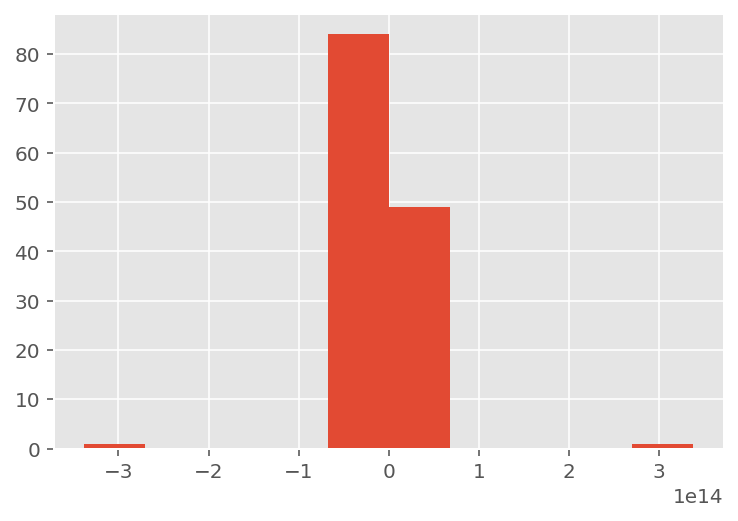

In [13]:
#Linear Regression of the data (2)
lr.fit(X_test,y_test)
linreg_scores = cross_val_score(lr, X_test, y_test, cv=10)
print(linreg_scores)
print(np.mean(linreg_scores))
plt.hist(lr.coef_)
plt.show()

In [14]:
predictions_train = cross_val_predict(lr, X_train, y_train, cv=5)
predictions_test = cross_val_predict(lr, X_test,y_test, cv=5)
predictions_train.shape

(1052,)

In [15]:
variance = []
df_train = pd.DataFrame(variance)
df_train['predicted'] = predictions_train
df_train['actual'] = y_train
df_train['variance'] = y_train-predictions_train

In [16]:
df_train

,predicted,actual,variance
0,204312.307793,208500.0,4187.692207
1,216760.744560,181500.0,-35260.744560
2,207007.474716,223500.0,16492.525284
3,200841.431084,140000.0,-60841.431084
4,320944.216560,250000.0,-70944.216560
...,...,...,...
1047,122576.141354,NaN,NaN
1048,128383.237629,227000.0,22037.313755
1049,200851.796612,180000.0,-17559.133480
1050,183354.845257,150500.0,-8111.961758


In [17]:
#Ridge CV model (1)
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))
pd.DataFrame(model.coef_).sort_values(by=0)


Best alpha: 2.782559402207126
Training score: 0.8618910663013547
Test Score: 0.8998125316106028


,0
36,-29031.539581
54,-27172.978325
22,-23393.693970
58,-22602.701939
114,-20531.290765
...,...
105,21234.519753
100,34986.613127
63,39872.018529
62,51160.052415


In [18]:
hold_1 = pd.DataFrame(model.coef_)
hold_1.columns = ['coefficients']
hold_1['names'] = X_train.columns
hold_1.sort_values(by='coefficients', ascending=False)

,coefficients,names
69,52362.824535,Neighborhood_StoneBr
62,51160.052415,Neighborhood_NoRidge
63,39872.018529,Neighborhood_NridgHt
100,34986.613127,BsmtQual_Ex
105,21234.519753,BsmtExposure_Gd
...,...,...
114,-20531.290765,GarageType_2Types
58,-22602.701939,Neighborhood_Mitchel
22,-23393.693970,KitchenAbvGr
54,-27172.978325,Neighborhood_Edwards


In [19]:
hold_1[hold_1['coefficients']!=0]['coefficients'].sort_values().plot(kind='barh', figsize=(80, 80));
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.show()

In [20]:
#Lasso CV (1)
model = LassoCV(alphas=np.logspace(-4, 4, 10), max_iter=10000000, cv=10)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_) 
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))
pd.DataFrame(model.coef_)


Best alpha: 166.81005372000558
Training score: 0.8519475255286194
Test Score: 0.8977445245950085


,0
0,-206.958467
1,123.525545
2,366.467149
3,48.316691
4,10593.725692
...,...
130,0.000000
131,0.000000
132,-0.000000
133,0.000000


In [21]:
model_coef = model.coef_

In [22]:
#pd.DataFrame(model.coef_).plot(kind='barh', figsize=(12, 12), legend=False)
hold = pd.DataFrame(model.coef_)
hold.columns = ['coefficients']
hold['names'] = X_train.columns
hold.sort_values(by='coefficients', ascending=False)

,coefficients,names
62,59441.812618,Neighborhood_NoRidge
69,58184.029515,Neighborhood_StoneBr
63,43589.281560,Neighborhood_NridgHt
100,41028.047241,BsmtQual_Ex
68,21062.380627,Neighborhood_Somerst
...,...,...
38,-11891.641673,LandContour_Bnk
58,-12332.111275,Neighborhood_Mitchel
54,-14632.658388,Neighborhood_Edwards
22,-19205.320225,KitchenAbvGr


In [23]:
hold[hold['coefficients']!=0]['coefficients'].sort_values().plot(kind='barh', figsize=(80, 80));
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.show()


In [24]:
# Lasso CV (2)
model = LassoCV(alphas=np.logspace(-4, 4, 10), max_iter=10000000, cv=10)
# fit the model
model.fit(X_test_s, y_test)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test_s, y_test))
pd.DataFrame(model.coef_).sort_values(by=0)

Best alpha: 1291.5496650148827
Training score: -2976355.1469790847
Test Score: 0.9579689721964397


,0
103,-3548.195155
129,-3383.849362
83,-3110.453840
61,-2279.590091
0,-2142.790596
...,...
10,10735.096195
11,11110.099728
100,11376.000528
12,15258.179384


In [25]:
hold_2 = pd.DataFrame(model.coef_)
hold_2.columns = ['coefficients']
hold_2['names'] = X_test.columns
hold_2.sort_values(by='coefficients', ascending=False)

,coefficients,names
3,18587.229459,GrLivArea
12,15258.179384,TotalBsmtSF
100,11376.000528,BsmtQual_Ex
11,11110.099728,BsmtFinSF1
10,10735.096195,MasVnrArea
...,...,...
0,-2142.790596,MSSubClass
61,-2279.590091,Neighborhood_NWAmes
83,-3110.453840,BldgType_Duplex
129,-3383.849362,SaleCondition_Abnorml


In [26]:
hold_2[hold_2['coefficients']!=0]['coefficients'].sort_values().plot(kind='barh', figsize=(80, 80));
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.show()



## Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

What are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
non_fixed_char = house[['SalePrice', 'Utilities', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                      'CentralAir', 'Electrical','KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence' ]]

In [29]:
non_fixed_char = pd.get_dummies(non_fixed_char)

In [30]:
non_fixed_char.shape
non_fixed_char_copy = non_fixed_char.copy()

In [31]:
y = non_fixed_char_copy.pop('SalePrice')

In [32]:
X = non_fixed_char_copy

In [33]:
scalerm = MinMaxScaler()
X_s = scalerm.fit_transform(X)

In [34]:
#Split the data
X_train_mutable, X_test_mutable, y_train_mutable, y_test_mutable = train_test_split(
    X_s, y, test_size=0.2, random_state=1)

In [35]:
predictions_train_mutable = cross_val_predict(lr, X_train_mutable, y_train_mutable, cv=5)
predictions_test_mutable = cross_val_predict(lr, X_test_mutable,y_test_mutable, cv=5)
predictions_train_mutable.shape

(1168,)

In [36]:
#Run the Ridge CV model
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train_mutable, y_train_mutable)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train_mutable, y_train_mutable))
# evaluate on the test set
print("Test Score:", model.score(X_test_mutable, y_test_mutable))
pd.DataFrame(model.coef_).sort_values(by=0, ascending =False)

Best alpha: 2.782559402207126
Training score: 0.6223006563554538
Test Score: 0.6409017283344116


,0
41,81674.566655
30,75346.324752
49,45003.564074
43,40847.252026
45,33557.521692
...,...
1,-18969.593238
35,-19169.196035
68,-24823.102005
33,-35013.123948


In [37]:
mutable_1 = pd.DataFrame(model.coef_)
mutable_1.columns = ['coefficients']
mutable_1['names'] = X.columns
mutable_1.sort_values(by='coefficients', ascending=False)

,coefficients,names
41,81674.566655,FireplaceQu_Ex
30,75346.324752,KitchenQual_Ex
49,45003.564074,GarageQual_Ex
43,40847.252026,FireplaceQu_Gd
45,33557.521692,FireplaceQu_TA
...,...,...
1,-18969.593238,Utilities_NoSeWa
35,-19169.196035,Functional_Maj2
68,-24823.102005,Fence_MnWw
33,-35013.123948,KitchenQual_TA


In [38]:
mutable_1[mutable_1['coefficients']!=0]['coefficients'].sort_values().plot(kind='barh', figsize=(80, 80));
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.show()

In [39]:
varianc = []
df_train_mutable = pd.DataFrame(varianc)
#df_train['characteristics'] = X_train_mutable.columns
df_train_mutable['predicted'] = predictions_train_mutable
df_train['actual'] = y_train_mutable
df_train['variance'] = y_train_mutable - predictions_train_mutable


In [40]:
predictions_train_mutable.shape

(1168,)

Given the coefficients that are present here in this model after running a MinMax scaler, it becomes quite apparent as to what features are worth further investigating to determine if the house is worth buying. It seems as though a large amount of money can be described by the quality of things that can be changed. The higher the quality the more people are willing to pay for it (Not a terribly astute observation but what the model is depicting). With this in mind there are some factors that are worth considering more than others - for example, the quality of the Fireplace, Kitchen, and Garage are quite important for predicting the sale value of a house. This model is not very good, and I do not know that I would reccomend it for use in Ames Iowa for this project, however it seems to work to some degree of accuracy.